In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#EL OBJETIVO ES, A PARTIR DE ESTE DATASET, QUE CONTIENE DATOS SOCIOECONÓMICOS DE DIFERENTES PERSONAS, PODER PREDECIR SI LAS MISMAS COBRAN MÁS O MENOS DE 50.000 DOLARES.
#EL DATASET ESTÁ HECHO SOBRE TODO A PARTIR DE STRINGS CON LO QUE EXIGE UNA CIERTA LABOR DE CONVERSIÓN DE DATOS.
data = pd.read_csv('income_evaluation.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
 workclass         32561 non-null object
 fnlwgt            32561 non-null int64
 education         32561 non-null object
 education-num     32561 non-null int64
 marital-status    32561 non-null object
 occupation        32561 non-null object
 relationship      32561 non-null object
 race              32561 non-null object
 sex               32561 non-null object
 capital-gain      32561 non-null int64
 capital-loss      32561 non-null int64
 hours-per-week    32561 non-null int64
 native-country    32561 non-null object
 income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [6]:
data.columns = data.columns.str.strip()

In [7]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
data.drop(['fnlwgt','relationship','marital-status','native-country', 'occupation'], axis = 1, inplace = True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education-num     32561 non-null int64
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
income            32561 non-null object
dtypes: int64(5), object(5)
memory usage: 2.5+ MB


In [10]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
data['workclass'] = data['workclass'].str.strip()

In [12]:
data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [13]:
data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [14]:
data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [15]:
#data = data[data['workclass'].str.contains('Private' or 'Self-emp-not-inc' or 'Local-gov' or 'State-gov' or 'Self-emp-inc' or 'Federal-gov' or 'Without-pay' or 'Never-worked')]
#data=data[~data.workclass.str.contains("?")]
#data=data[~data['workclass'].str.contains("?")]
data = data[~data['workclass'].isin(['?'])].reset_index()

In [16]:
data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [17]:
def emp_publico(x, publico = ['Local-gov', 'State-gov', 'Federal-gov']):
    for a in publico: 
        if a in x: 
            return 1
    return 2
    
data['workclass'] = data['workclass'].apply(emp_publico)

In [18]:
data['workclass'].value_counts()

2    26374
1     4351
Name: workclass, dtype: int64

In [19]:
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [20]:
data['education'] = data['education'].str.strip()

In [21]:
data['education'].value_counts()

HS-grad         9969
Some-college    6777
Bachelors       5182
Masters         1675
Assoc-voc       1321
11th            1057
Assoc-acdm      1020
10th             833
7th-8th          574
Prof-school      558
9th              463
Doctorate        398
12th             393
5th-6th          303
1st-4th          156
Preschool         46
Name: education, dtype: int64

In [22]:
primaria = ['Preschool', '1st-4th', '5th-6th','7th-8th']
secundaria = ['9th', '10th', '11th','12th']
highschool = ['HS-grad','Prof-school']
universitaria = ['Some-college','Bachelors','Assoc-voc','Assoc-acdm','Masters','Doctorate']


data['education']=data['education'].replace(primaria, 1)
data['education']=data['education'].replace(secundaria, 2)
data['education']=data['education'].replace(highschool, 3)
data['education']=data['education'].replace(universitaria, 4)






In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30725 entries, 0 to 30724
Data columns (total 11 columns):
index             30725 non-null int64
age               30725 non-null int64
workclass         30725 non-null int64
education         30725 non-null int64
education-num     30725 non-null int64
race              30725 non-null object
sex               30725 non-null object
capital-gain      30725 non-null int64
capital-loss      30725 non-null int64
hours-per-week    30725 non-null int64
income            30725 non-null object
dtypes: int64(8), object(3)
memory usage: 2.6+ MB


In [24]:
data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [25]:
razas = [' Black', ' Other', ' Asian-Pac-Islander',' Amer-Indian-Eskimo']


data['race']=data['race'].replace(razas, 'Other')

In [26]:
data['race']=data['race'].replace({' White' : 2, 'Other': 1, })


In [27]:
data['race'].value_counts().sum()

30725

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30725 entries, 0 to 30724
Data columns (total 11 columns):
index             30725 non-null int64
age               30725 non-null int64
workclass         30725 non-null int64
education         30725 non-null int64
education-num     30725 non-null int64
race              30725 non-null int64
sex               30725 non-null object
capital-gain      30725 non-null int64
capital-loss      30725 non-null int64
hours-per-week    30725 non-null int64
income            30725 non-null object
dtypes: int64(9), object(2)
memory usage: 2.6+ MB


In [29]:
data['sex'] = pd.get_dummies(data.sex, drop_first=True)

In [30]:
data.head(10)

,index,age,workclass,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,income
0,0,39,1,4,13,2,1,2174,0,40,<=50K
1,1,50,2,4,13,2,1,0,0,13,<=50K
2,2,38,2,3,9,2,1,0,0,40,<=50K
3,3,53,2,2,7,1,1,0,0,40,<=50K
4,4,28,2,4,13,1,0,0,0,40,<=50K
5,5,37,2,4,14,2,0,0,0,40,<=50K
6,6,49,2,2,5,1,0,0,0,16,<=50K
7,7,52,2,3,9,2,1,0,0,45,>50K
8,8,31,2,4,14,2,0,14084,0,50,>50K
9,9,42,2,4,13,2,1,5178,0,40,>50K


In [31]:
data['income']=data['income'].replace({' <=50K' : 0, ' >50K': 1, })

In [32]:
data

,index,age,workclass,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,income
0,0,39,1,4,13,2,1,2174,0,40,0
1,1,50,2,4,13,2,1,0,0,13,0
2,2,38,2,3,9,2,1,0,0,40,0
3,3,53,2,2,7,1,1,0,0,40,0
4,4,28,2,4,13,1,0,0,0,40,0
5,5,37,2,4,14,2,0,0,0,40,0
6,6,49,2,2,5,1,0,0,0,16,0
7,7,52,2,3,9,2,1,0,0,45,1
8,8,31,2,4,14,2,0,14084,0,50,1
9,9,42,2,4,13,2,1,5178,0,40,1


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30725 entries, 0 to 30724
Data columns (total 11 columns):
index             30725 non-null int64
age               30725 non-null int64
workclass         30725 non-null int64
education         30725 non-null int64
education-num     30725 non-null int64
race              30725 non-null int64
sex               30725 non-null uint8
capital-gain      30725 non-null int64
capital-loss      30725 non-null int64
hours-per-week    30725 non-null int64
income            30725 non-null int64
dtypes: int64(10), uint8(1)
memory usage: 2.4 MB


In [34]:
data_corr = data.corr()
data_corr

,index,age,workclass,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,income
index,1.000000,-0.001846,0.001198,-0.003959,-0.000598,-0.003048,-0.001880,0.001702,-0.002843,-0.001548,0.005233
age,-0.001846,1.000000,-0.086877,-0.031504,0.043884,0.028888,0.082028,0.080420,0.060463,0.102192,0.242546
workclass,0.001198,-0.086877,1.000000,-0.125546,-0.158010,0.059116,0.046408,0.015668,-0.013581,0.015529,-0.055626
education,-0.003959,-0.031504,-0.125546,1.000000,0.813371,0.036477,-0.039007,0.038462,0.039417,0.088955,0.211856
education-num,-0.000598,0.043884,-0.158010,0.813371,1.000000,0.049336,0.007390,0.124257,0.079357,0.151367,0.334697
race,-0.003048,0.028888,0.059116,0.036477,0.049336,1.000000,0.102232,0.014645,0.023491,0.052718,0.084563
sex,-0.001880,0.082028,0.046408,-0.039007,0.007390,0.102232,1.000000,0.047750,0.047000,0.230253,0.216584
capital-gain,0.001702,0.080420,0.015668,0.038462,0.124257,0.014645,0.047750,1.000000,-0.032325,0.079560,0.221882
capital-loss,-0.002843,0.060463,-0.013581,0.039417,0.079357,0.023491,0.047000,-0.032325,1.000000,0.053998,0.151483
hours-per-week,-0.001548,0.102192,0.015529,0.088955,0.151367,0.052718,0.230253,0.079560,0.053998,1.000000,0.228611


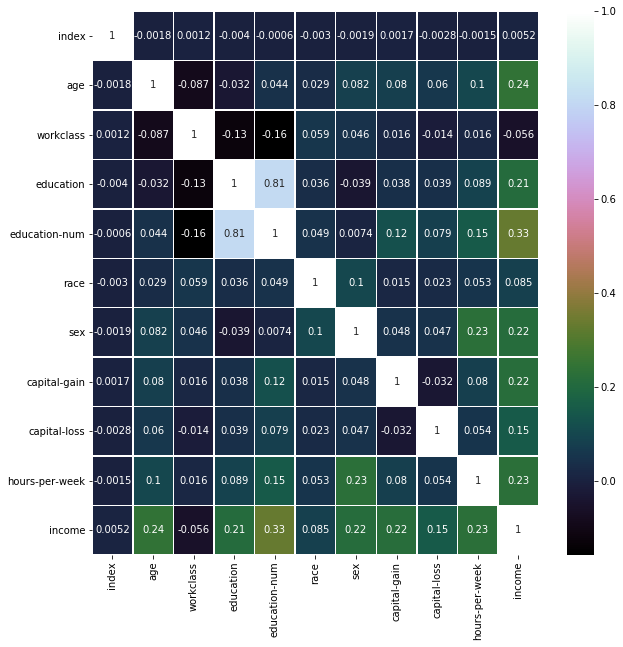

In [35]:
#UNA VEZ TRANSFORMADOS LOS DATOS EN NÚMEROS PROCEDO A GENERAR EL HEATMAP PARA ASEGURARME DE QUE NO HAY CORRELACIONES DEMASIADO ELEVADAS.
plt.figure(figsize=(10,10))
sns.heatmap(data_corr,linewidths=0.5,cmap="cubehelix", annot=True)

In [36]:
#PREPARACIÓN DE LOS MODELOS DE ML.
X= data.drop(axis=1, labels=["income"])
y= data.income

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(24580, 10) (6145, 10) (24580,) (6145,)


In [38]:
#EN PRINCIPIO, PLANTEO ESTOS TRES MODELOS. EL SVM NO FUNCIONARÁ CON LO QUE PLANTEARÉ EL 
#GRADIENTBOOSTERCLASSIFIER COMO ALTERNATIVA (NO OBSTANTE, ESTE CON ESTE MODELO NO CONSEGUIRÉ HACER LA ROC CURVE)
lr = LogisticRegression(solver ='liblinear',max_iter=500)
clf = svm.SVC(gamma='auto', probability=True)
rforest = RandomForestClassifier(n_estimators=10)


In [39]:
lr.fit(X_train, y_train)
#clf.fit(X_train, y_train) POR ALGUNA RAZÓN QUE DESCONOZCO AL ENTRENAR ESTE MODELO SE ME QUEDA COLGADO
rforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
y_pred = lr.predict(X_test)
y_pred2 = rforest.predict(X_test)
print("Accuracy LG:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred2))

Accuracy LG: 0.8113913751017087
Accuracy RF: 0.8192026037428803


In [41]:
c_matrix_lr = confusion_matrix(y_test, y_pred)
c_matrix_rforest = confusion_matrix(y_test, y_pred2)
print(c_matrix_lr)
print(c_matrix_rforest)

[[4435  250]
 [ 909  551]]
[[4281  404]
 [ 707  753]]


In [42]:
#ESTA FUNCIÓN LA HE COGIDO DE UN COMPAÑERO PORQUE ME PARECÍA MUY ÚTIL EL CÁLCULO TEMPORAL QUE HACE.
def RF_grid(X, X_train, X_test, y_train, y, y_test, n_est=100, max_depth=2):
    results=[]
    for est in n_est:
        for depth in max_depth:
            now = time.time()
            clf = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=0)
            scores = cross_val_score(clf, X, y, cv=5)
            res={
                'Num-Estimators':est,
                'Max-Depth':depth,
                'Score':np.mean(scores),
                'Comp-Time':time.time()-now
            }
            results.append(res)
    return results

In [43]:
import os
import time
from sklearn.model_selection import cross_val_score
n_est = [5,10,50,100]
max_depth = [3,4,5]
grid_result = pd.DataFrame(RF_grid(X, X_train, X_test, y_train, y, y_test, n_est, max_depth))
grid_result['Score/Time'] = grid_result['Score']/grid_result['Comp-Time']
display(grid_result)

,Comp-Time,Max-Depth,Num-Estimators,Score,Score/Time
0,0.375857,3,5,0.818161,2.176786
1,0.378460,4,5,0.821090,2.169555
2,0.427488,5,5,0.809731,1.894163
3,0.557364,3,10,0.806574,1.447122
4,0.646350,4,10,0.822718,1.272867
5,0.736570,5,10,0.823759,1.118372
6,2.513140,3,50,0.806314,0.320839
7,2.980058,4,50,0.826851,0.277461
8,3.442936,5,50,0.831538,0.241520
9,4.983380,3,100,0.806347,0.161807


In [44]:
#OTRA FORMA DE OPTIMIZAR LOS MODELOS ES POR MEDIO DE GridSearchCV. LO HAGO A CONTINUACIÓN.
rfc=RandomForestClassifier(random_state=42)

In [45]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

In [46]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [47]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [48]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [49]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [50]:
pred=rfc1.predict(X_test)
print(pred)

[0 0 0 ... 0 0 0]


In [51]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8437754271765663


In [52]:
#PRUEBO GRADIENT BOOSTER. EL RESULTADO ES BUENO PERO NO CONSEGUIRÉ HACER CON ÉL LA ROC CURVE.
from sklearn.ensemble import GradientBoostingClassifier
#gr_boosted = GradientBoostingClassifier().fit(X_train, y_train)
#prediction_gr = gr_boosted.predict(X_test)
#score_booster = gr_boosted.score(X_test, y_test)
#print(prediction_gr)
#print(score_booster)

In [53]:
gr_boosted = GradientBoostingClassifier()
gr_boosted.fit(X_train, y_train)
prediction_gr = gr_boosted.predict(X_test)
score_booster = gr_boosted.score(X_test, y_test)
print(prediction_gr)
print(score_booster)

[0 0 0 ... 0 0 0]
0.8470301057770545


In [54]:
confusion_matrix(y_test, prediction_gr)

array([[4476,  209],
       [ 731,  729]])

Confusion matrix, without normalization
[[4435  250]
 [ 909  551]]
Normalized confusion matrix
[[0.95 0.05]
 [0.62 0.38]]


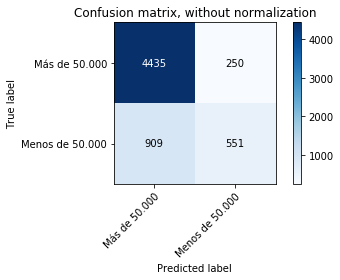

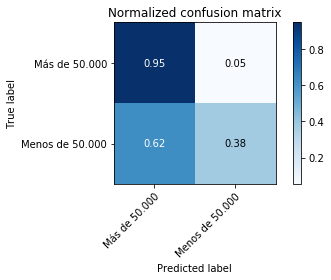

In [55]:
from sklearn.utils.multiclass import unique_labels

class_names = ['Más de 50.000','Menos de 50.000']

def plot_confusion_matrix(y_true, y_pred_test, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred_test)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred_test)]
    classes = class_names
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix LOGISTIC REGRESSION
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix LOGISTIC REGRESSION
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[4281  404]
 [ 707  753]]
Normalized confusion matrix
[[0.91 0.09]
 [0.48 0.52]]


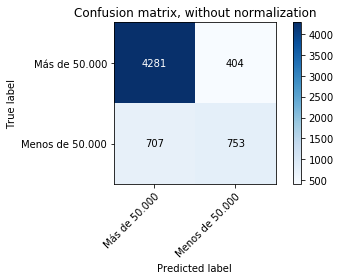

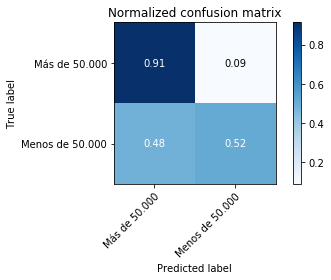

In [56]:
# Plot non-normalized confusion matrix RAINFOREST
plot_confusion_matrix(y_test, y_pred2, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix RAINFOREST
plot_confusion_matrix(y_test, y_pred2, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

Confusion matrix, without normalization
[[4476  209]
 [ 731  729]]
Normalized confusion matrix
[[0.96 0.04]
 [0.5  0.5 ]]


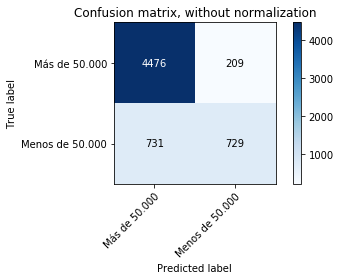

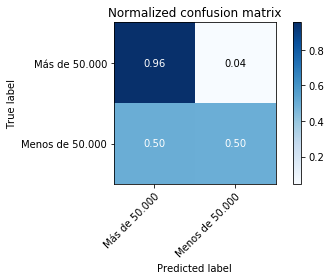

In [57]:
# Plot non-normalized confusion matrix GRADIENTBOOSTER
plot_confusion_matrix(y_test, prediction_gr, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix GRADIENTBOOSTER
plot_confusion_matrix(y_test, prediction_gr, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

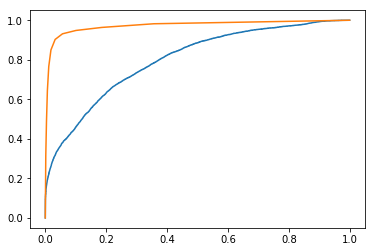

In [58]:
#ROC CURVES DE LOS DISTINTOS MODELOS

def plotMetricsCompare(X, y, lr):
    lr.fit(X_train, y_train)
    y_pred = lr.predict_proba(X)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y,  y_pred)
    auc = metrics.roc_auc_score(y, y_pred)
    plt.plot(fpr,tpr)
plotMetricsCompare(X, y, lr)

plotMetricsCompare(X, y, rforest)




#clf.fit(X_train, y_train)
#rforest.fit(X_train, y_train)



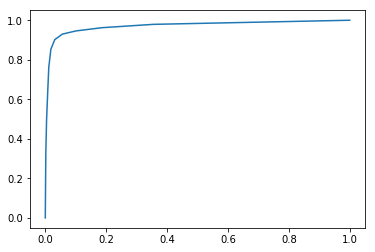

In [59]:
#ROC CURVE DE RAINFOREST
def plotMetricsCompare(X, y, rforest):
    rforest.fit(X_train, y_train)
    y_pred = rforest.predict_proba(X)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y,  y_pred)
    auc = metrics.roc_auc_score(y, y_pred)
    plt.plot(fpr,tpr)
plotMetricsCompare(X, y, rforest)




In [60]:
def plotMetricsCompare(X, y, gr_boosted):
    gr_boosted.fit(X_train, y_train)
    y_pred = gr_boosted.predict_proba(X)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y,  prediction_gr)
    auc = metrics.roc_auc_score(y, prediction_gr)
    plt.plot(fpr,tpr)
plotMetricsCompare(X, y, gr_boosted)



ValueError: Found input variables with inconsistent numbers of samples: [30725, 6145]

NO ENTIENDO PORQUÉ SI EL ACCURACY DE LOS DOS ERA MUY PARECIDO LA ROC CURVE DEL RAINFOREST ES MUCHO MÁS PRECISA

In [61]:
#PRUEBO CON LOS MODELOS DE ONEvsONE Y ONEvsREST
classifier=OneVsOneClassifier(rforest).fit(X_train, y_train)
classifier=OneVsRestClassifier(rforest).fit(X_train, y_train) 
score = classifier.score(X_test, y_test)
score1 = classifier.score(X_test, y_test)
print(score)
print(score1)

0.8216436126932466
0.8216436126932466


In [ ]:
def plotMetricsCompare(X, y, cls):
    cls.fit(X_train, y_train)
    y_pred = cls.predict_proba(X)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y,  y_pred)
    auc = metrics.roc_auc_score(y, y_pred)
    plt.plot(fpr,tpr)
plotMetricsCompare(X, y, cls)





In [ ]:
#MUY INTERESANTE ESTO:

'columns_to_drop=[]                   # con esto observo las columnas colineales
'for c in X.columns:
   ' for i in range(len(X.corr())):
     '   if abs(X.corr()[c][i])>0.9 and abs(X.corr()[c][i])<0.97:columns_to_drop.append(c)
'columns_to_drop=list(set(columns_to_drop))   
'len(columns_to_drop)'
# segun el criterio no hay colinealidad
# esto se puede hacer también por el método de Gauss, aunque requiere más computo

